In [1]:
pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 18.8 MB/s eta 0:00:00


In [3]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [4]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: List[str]
    result: str

In [13]:
def first_node(state: AgentState):
    """ first node ... """
    state["result"] = state["name"] + ", welcome to the system!"

    return state

def second_node(state: AgentState):
    """ second node ..."""
    state["result"] = state["result"] + f" You are {state['age']} years old!"

    return state

def third_node(state: AgentState):
    """ third node ..."""
    state["result"] = state["result"] + f" You have skills in: {', '.join(state['skills'])}"

    return state

In [14]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)

graph.set_entry_point("first_node")
graph.set_finish_point("third_node")

graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")

app = graph.compile()

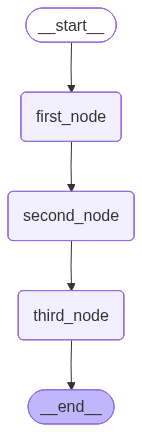

In [15]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
app.invoke({"name": "Linda", "age": 31, "skills": ["Python", "Machine Learning", "LangGraph"]})

{'name': 'Linda',
 'age': 31,
 'skills': ['Python', 'Machine Learning', 'LangGraph'],
 'result': 'Linda, welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning, LangGraph'}